In [2]:
import pandas as pd

df_lp_squad = pd.read_pickle('lp_results/lp_squads.pkl')
df_ml_squad = pd.read_pickle('ml_results/ml_ridge_squads.pkl')
df_ga_squad = pd.read_pickle('ga_results/ga_avg_squad.pkl')

df_bench_up = pd.read_pickle('data/df_totw.pkl')
df_bench_low = pd.read_pickle('data/df_bench_lower.pkl')

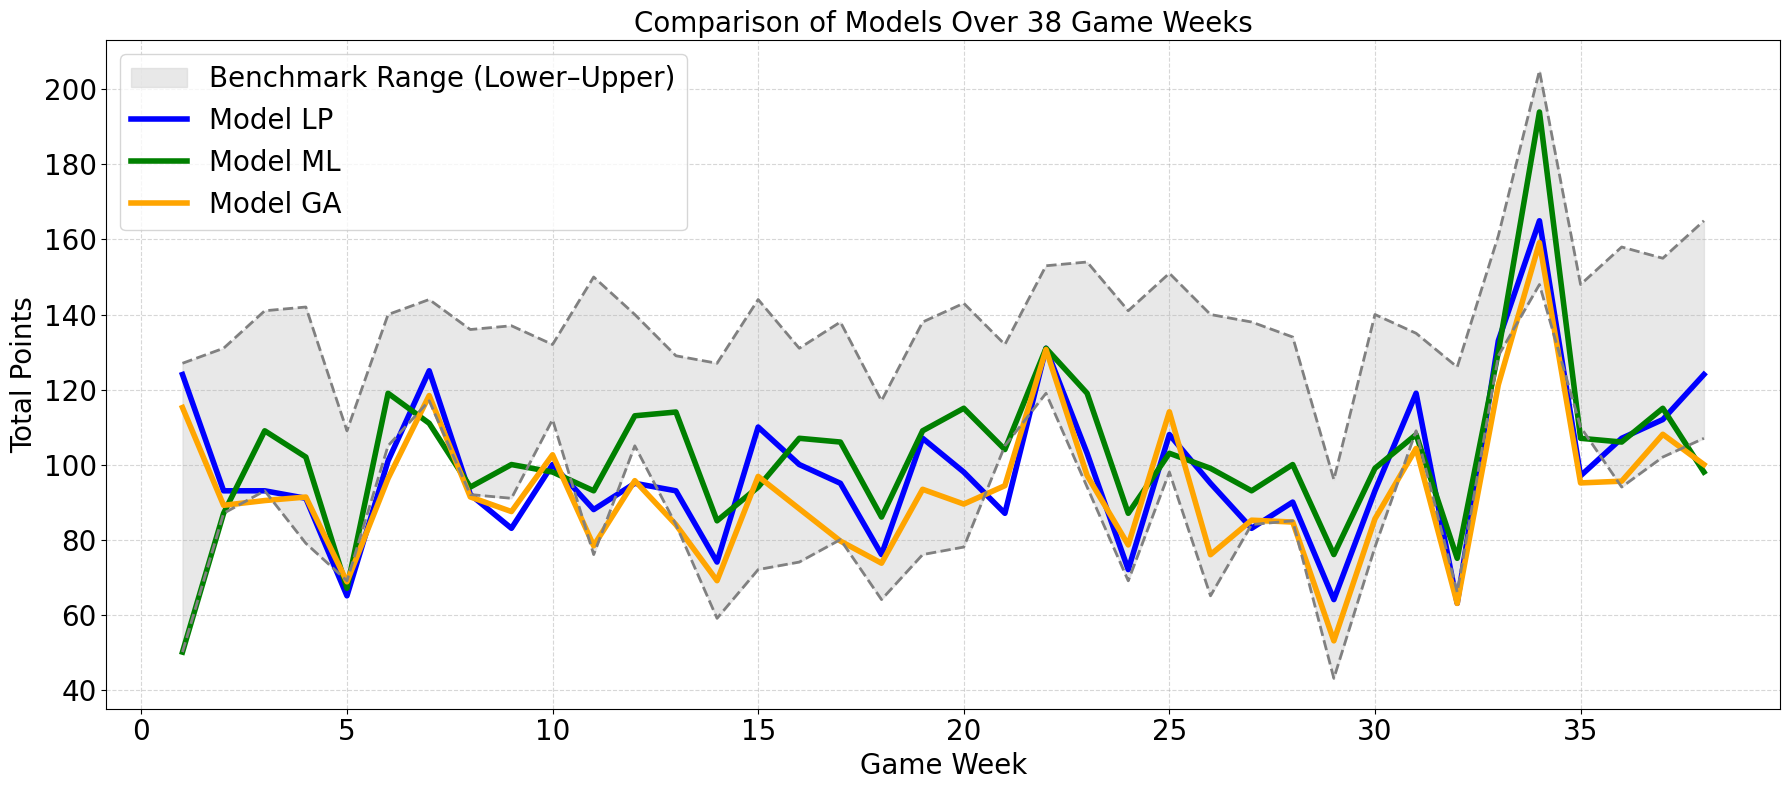

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate data
np.random.seed(42)
weeks = np.arange(1, 39)

# Benchmarks
max_points = df_bench_up[['GW', 'total_points']].groupby('GW').sum()['total_points'].values
min_points = df_bench_low[['GW', 'total_points']].groupby('GW').sum()['total_points'].values

# 3 Models
model_LP = df_lp_squad[['GW', 'total_points']].groupby('GW').sum()['total_points'].values
model_ML = df_ml_squad[['GW', 'total_points']].groupby('GW').sum()['total_points'].values
model_GA = df_ga_squad['total_points'].values

# Plot
plt.figure(figsize=(18, 8))
plt.fill_between(weeks, min_points, max_points, color='lightgray', alpha=0.5, label='Benchmark Range (Lower–Upper)')

plt.plot(weeks, model_LP, label='Model LP', color='blue', linewidth=4)
plt.plot(weeks, model_ML, label='Model ML', color='green', linewidth=4)
plt.plot(weeks, model_GA, label='Model GA', color='orange', linewidth=4)

# Optional: Highlight actual max line
plt.plot(weeks, max_points, linestyle='--', color='gray', linewidth=2)
plt.plot(weeks, min_points, linestyle='--', color='gray', linewidth=2)

# Labels and title
plt.title('Comparison of Models Over 38 Game Weeks', fontsize=20)
plt.xlabel('Game Week', fontsize=20)
plt.ylabel('Total Points', fontsize=20)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.tight_layout()
plt.show()
# plt.savefig("model_comparison.png", dpi=300, bbox_inches='tight')